In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [3]:
#to see if import the data successfully
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#i want to see the column headers in a list instead of having to scroll. so i use the info function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

I want to analyze what kind of people has asthma and if that affect the number of hospital day. The diagnostic code of asthma starts with 493.

In [5]:
#filtering rows with "493" for diagnosis 1. 
df2 = df[df['diag_1'] == '493']
df2

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
194,2600796,1451637,Caucasian,Female,[20-30),?,6,25,7,1,...,No,No,No,No,No,No,No,No,Yes,>30
461,4084572,4571388,AfricanAmerican,Female,[30-40),?,6,25,7,2,...,No,Down,No,No,No,No,No,Ch,Yes,NO
474,4140282,7443135,Caucasian,Female,[0-10),?,6,25,7,2,...,No,Steady,No,No,No,No,No,No,Yes,NO
956,7287294,1215324,Caucasian,Female,[40-50),?,6,25,1,2,...,No,No,No,No,No,No,No,Ch,Yes,NO
1022,7668324,102101652,Caucasian,Female,[40-50),?,1,1,7,4,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101230,436694174,49166001,?,Female,[40-50),?,1,1,7,7,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101252,436802996,44219088,Caucasian,Female,[40-50),?,2,1,1,5,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101276,437293874,93030849,Caucasian,Female,[40-50),?,2,1,1,3,...,No,No,No,No,No,No,No,No,No,NO
101489,440161580,36116343,Caucasian,Female,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,No,Yes,NO


In [6]:
#I just want to see how many rows have 'weight' as '?' to determine if the 'weight' has enough useful information to keep
df2[df2['weight'] == '?']

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
194,2600796,1451637,Caucasian,Female,[20-30),?,6,25,7,1,...,No,No,No,No,No,No,No,No,Yes,>30
461,4084572,4571388,AfricanAmerican,Female,[30-40),?,6,25,7,2,...,No,Down,No,No,No,No,No,Ch,Yes,NO
474,4140282,7443135,Caucasian,Female,[0-10),?,6,25,7,2,...,No,Steady,No,No,No,No,No,No,Yes,NO
956,7287294,1215324,Caucasian,Female,[40-50),?,6,25,1,2,...,No,No,No,No,No,No,No,Ch,Yes,NO
1022,7668324,102101652,Caucasian,Female,[40-50),?,1,1,7,4,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101230,436694174,49166001,?,Female,[40-50),?,1,1,7,7,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101252,436802996,44219088,Caucasian,Female,[40-50),?,2,1,1,5,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101276,437293874,93030849,Caucasian,Female,[40-50),?,2,1,1,3,...,No,No,No,No,No,No,No,No,No,NO
101489,440161580,36116343,Caucasian,Female,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,No,Yes,NO


1031 rows over 1056 rows have '?' for weight column, so I'll drop this column as it doesn't have enough data. 

In [7]:
#instead of dropping columns that I don't want, I'll create a new df with the columns that I want because that's less work.
df3 = df2[['patient_nbr','race','gender','age','admission_type_id','admission_source_id','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','diag_1','diag_2','diag_3','readmitted']]
df3

,patient_nbr,race,gender,age,admission_type_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,readmitted
194,1451637,Caucasian,Female,[20-30),6,7,1,66,0,6,0,0,0,493,250,?,>30
461,4571388,AfricanAmerican,Female,[30-40),6,7,2,36,0,10,0,0,0,493,250.02,401,NO
474,7443135,Caucasian,Female,[0-10),6,7,2,11,0,11,0,0,0,493,250.03,714,NO
956,1215324,Caucasian,Female,[40-50),6,1,2,56,0,6,0,0,0,493,250.02,401,NO
1022,102101652,Caucasian,Female,[40-50),1,7,4,38,0,17,0,0,1,493,250.01,401,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101230,49166001,?,Female,[40-50),1,7,7,41,0,29,0,1,3,493,250,300,>30
101252,44219088,Caucasian,Female,[40-50),2,1,5,67,0,22,0,1,0,493,263,466,NO
101276,93030849,Caucasian,Female,[40-50),2,1,3,54,0,6,1,0,0,493,250,780,NO
101489,36116343,Caucasian,Female,[40-50),1,7,1,1,0,17,0,0,0,493,250.02,787,NO


In [8]:
#replace '?' and 'Unknown/Invalid' with 'NaN'
missing_value = ['?','Unknown/Invalid']
df4 = df3.replace(missing_value,np.NaN)

In [9]:
#just checking if above replacing work
df4.tail(10)

,patient_nbr,race,gender,age,admission_type_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,readmitted
100736,136591664,Caucasian,Female,[30-40),2,4,9,47,3,34,0,0,0,493,401,272,NO
100986,60212178,Caucasian,Male,[40-50),1,7,5,36,0,19,0,0,0,493,V85,305,>30
101044,39791142,Caucasian,Male,[40-50),1,7,6,52,4,35,0,1,1,493,205,427,<30
101067,85217391,Caucasian,Female,[40-50),1,7,1,53,0,23,1,1,0,493,250.02,466,NO
101131,25865082,Caucasian,Female,[80-90),2,1,5,60,0,13,1,1,1,493,197,198,<30
101230,49166001,NaN,Female,[40-50),1,7,7,41,0,29,0,1,3,493,250,300,>30
101252,44219088,Caucasian,Female,[40-50),2,1,5,67,0,22,0,1,0,493,263,466,NO
101276,93030849,Caucasian,Female,[40-50),2,1,3,54,0,6,1,0,0,493,250,780,NO
101489,36116343,Caucasian,Female,[40-50),1,7,1,1,0,17,0,0,0,493,250.02,787,NO
101522,82737324,Caucasian,Female,[50-60),2,1,3,31,0,13,0,0,2,493,428,401,>30


In [10]:
#renaming the column names
df4.rename(columns={'patient_nbr':'patient number','admission_type_id':'admission type', 'admission_source_id':'admission source', 'time_in_hospital':'hospital day count','num_lab_procedures':'lab procedure count', 'num_procedures':'procedure count', 'num_medications':'medication count', 'number_outpatient':'outpatient visit count', 'number_emergency':'emergency visit count', 'number_inpatient':'inpatient visit count', 'diag_1':'diagnosis 1', 'diag_2':'diagnosis 2', 'diag_3':'diagnosis 3', 'readmitted':'readmitted days'}, inplace=True)
df4.head()

,patient number,race,gender,age,admission type,admission source,hospital day count,lab procedure count,procedure count,medication count,outpatient visit count,emergency visit count,inpatient visit count,diagnosis 1,diagnosis 2,diagnosis 3,readmitted days
194,1451637,Caucasian,Female,[20-30),6,7,1,66,0,6,0,0,0,493,250,NaN,>30
461,4571388,AfricanAmerican,Female,[30-40),6,7,2,36,0,10,0,0,0,493,250.02,401,NO
474,7443135,Caucasian,Female,[0-10),6,7,2,11,0,11,0,0,0,493,250.03,714,NO
956,1215324,Caucasian,Female,[40-50),6,1,2,56,0,6,0,0,0,493,250.02,401,NO
1022,102101652,Caucasian,Female,[40-50),1,7,4,38,0,17,0,0,1,493,250.01,401,>30


In [11]:
#the following shows the race of patient who has asthma
df4.groupby(['race'])['patient number'].count()

race
AfricanAmerican    296
Asian                7
Caucasian          672
Hispanic            51
Other               15
Name: patient number, dtype: int64

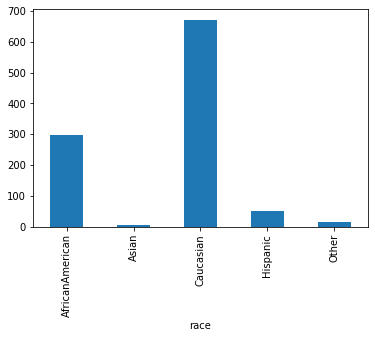

In [12]:
df4.groupby(['race'])['patient number'].count().plot(kind='bar')

Above plot show race distribution. Majority is Caucasian, but that could be because overall data has most race Caucasian as well.

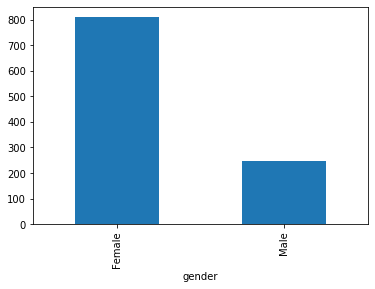

In [13]:
df4.groupby(['gender'])['patient number'].count().plot(kind='bar')

Above plot show the gender count. There are more female than male.

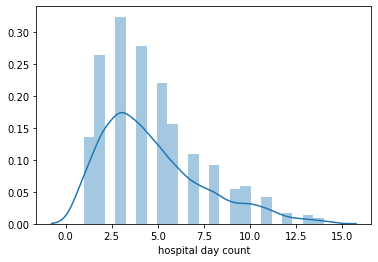

In [14]:
sns.distplot(df4['hospital day count'])

The above show how many days a patient stay at hospital. Majority of them stayed at hospital for 2-4 days each time.

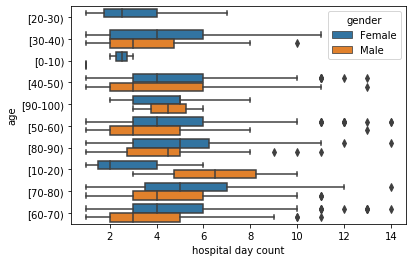

In [15]:
sns.boxplot(x='hospital day count', y='age', data=df4, hue='gender')

Above plot shows different age group and how many days they have to stay at hospital. Male aged 10-20 has to stay longer at hospital than older people in their 90s.

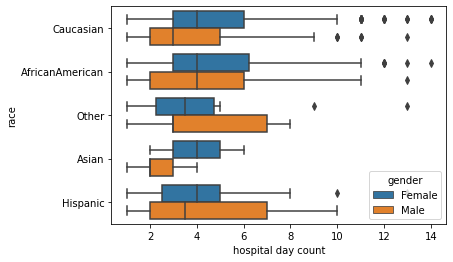

In [16]:
sns.boxplot(x='hospital day count', y='race', data=df4, hue='gender')

Above plot shows different race group and how many days they have to stay at hospital. Asian men don't stay at hopsital for over 4 days.

From the above analysis, I found that more female than male patients have asthma. Male patients usually have a shorter hospital stay than female patients, except for age group 10-20.